In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from sklearn import metrics
import seaborn as sns
import plotly.graph_objects as go #designing in plotly
import chart_studio.plotly as pt
from plotly.subplots import make_subplots #add_subplots
import plotly.express as px #to work with tidy objects
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
from plotly.offline import init_notebook_mode,iplot,plot,download_plotlyjs

In [3]:
init_notebook_mode()

In [4]:
cf.go_offline()
%matplotlib inline

In [5]:
finalcsv = pd.read_csv('FinalMalaria.csv',index_col='DATE(IST)',parse_dates=['DATE(IST)'])

In [6]:
corr = finalcsv.corr()

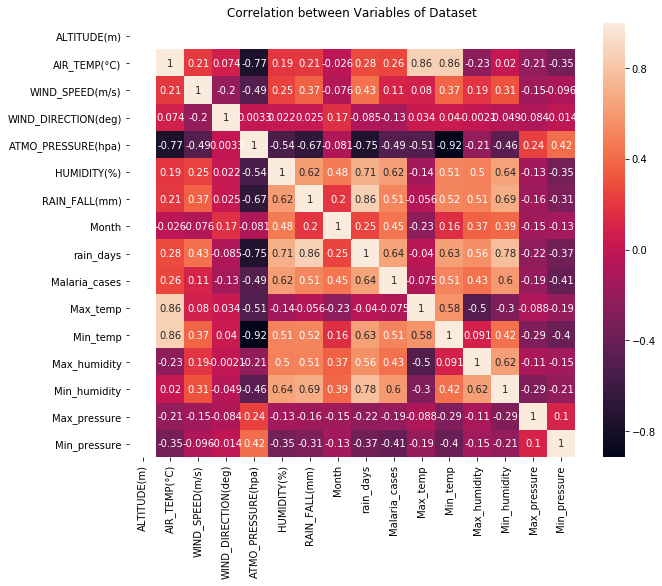

In [7]:
plt.figure(figsize=(10,8))
plt.title('Correlation between Variables of Dataset')
sns.heatmap(corr,annot=True)

In [8]:
finalcsv.columns

Index(['ALTITUDE(m)', 'AIR_TEMP(°C)', 'WIND_SPEED(m/s)', 'WIND_DIRECTION(deg)',
       'ATMO_PRESSURE(hpa)', 'HUMIDITY(%)', 'RAIN_FALL(mm)', 'Month',
       'rain_days', 'Malaria_cases', 'Max_temp', 'Min_temp', 'Max_humidity',
       'Min_humidity', 'Max_pressure', 'Min_pressure'],
      dtype='object')

In [9]:
haha = finalcsv[['AIR_TEMP(°C)','HUMIDITY(%)', 'RAIN_FALL(mm)','Malaria_cases']]

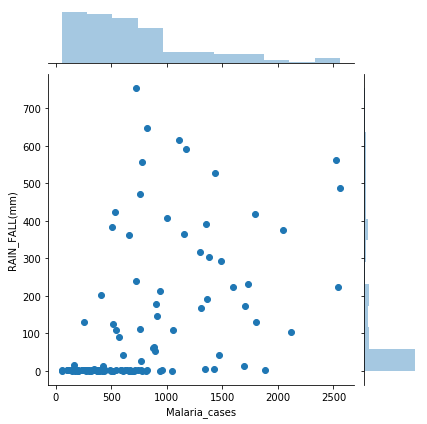

In [13]:
sns.jointplot(x=haha['Malaria_cases'],y=haha['RAIN_FALL(mm)'])

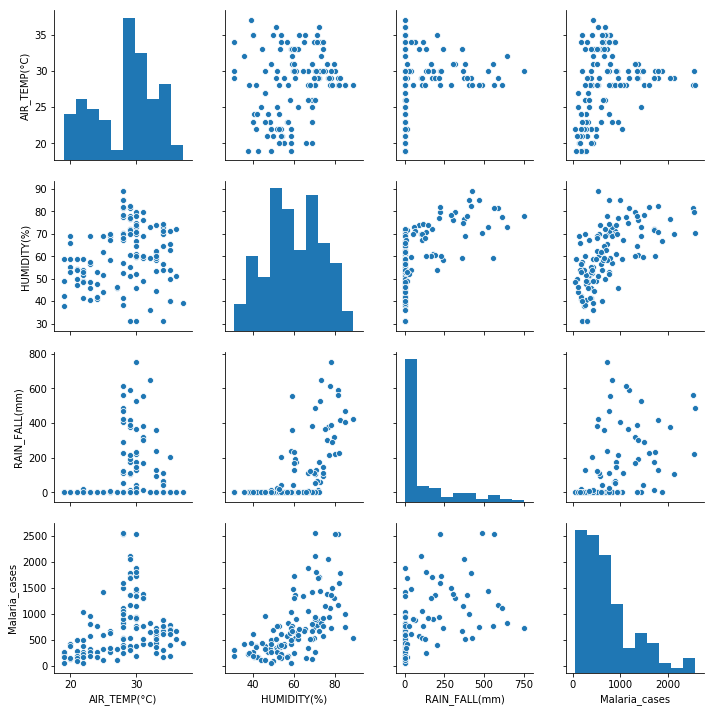

In [10]:
sns.pairplot(haha)

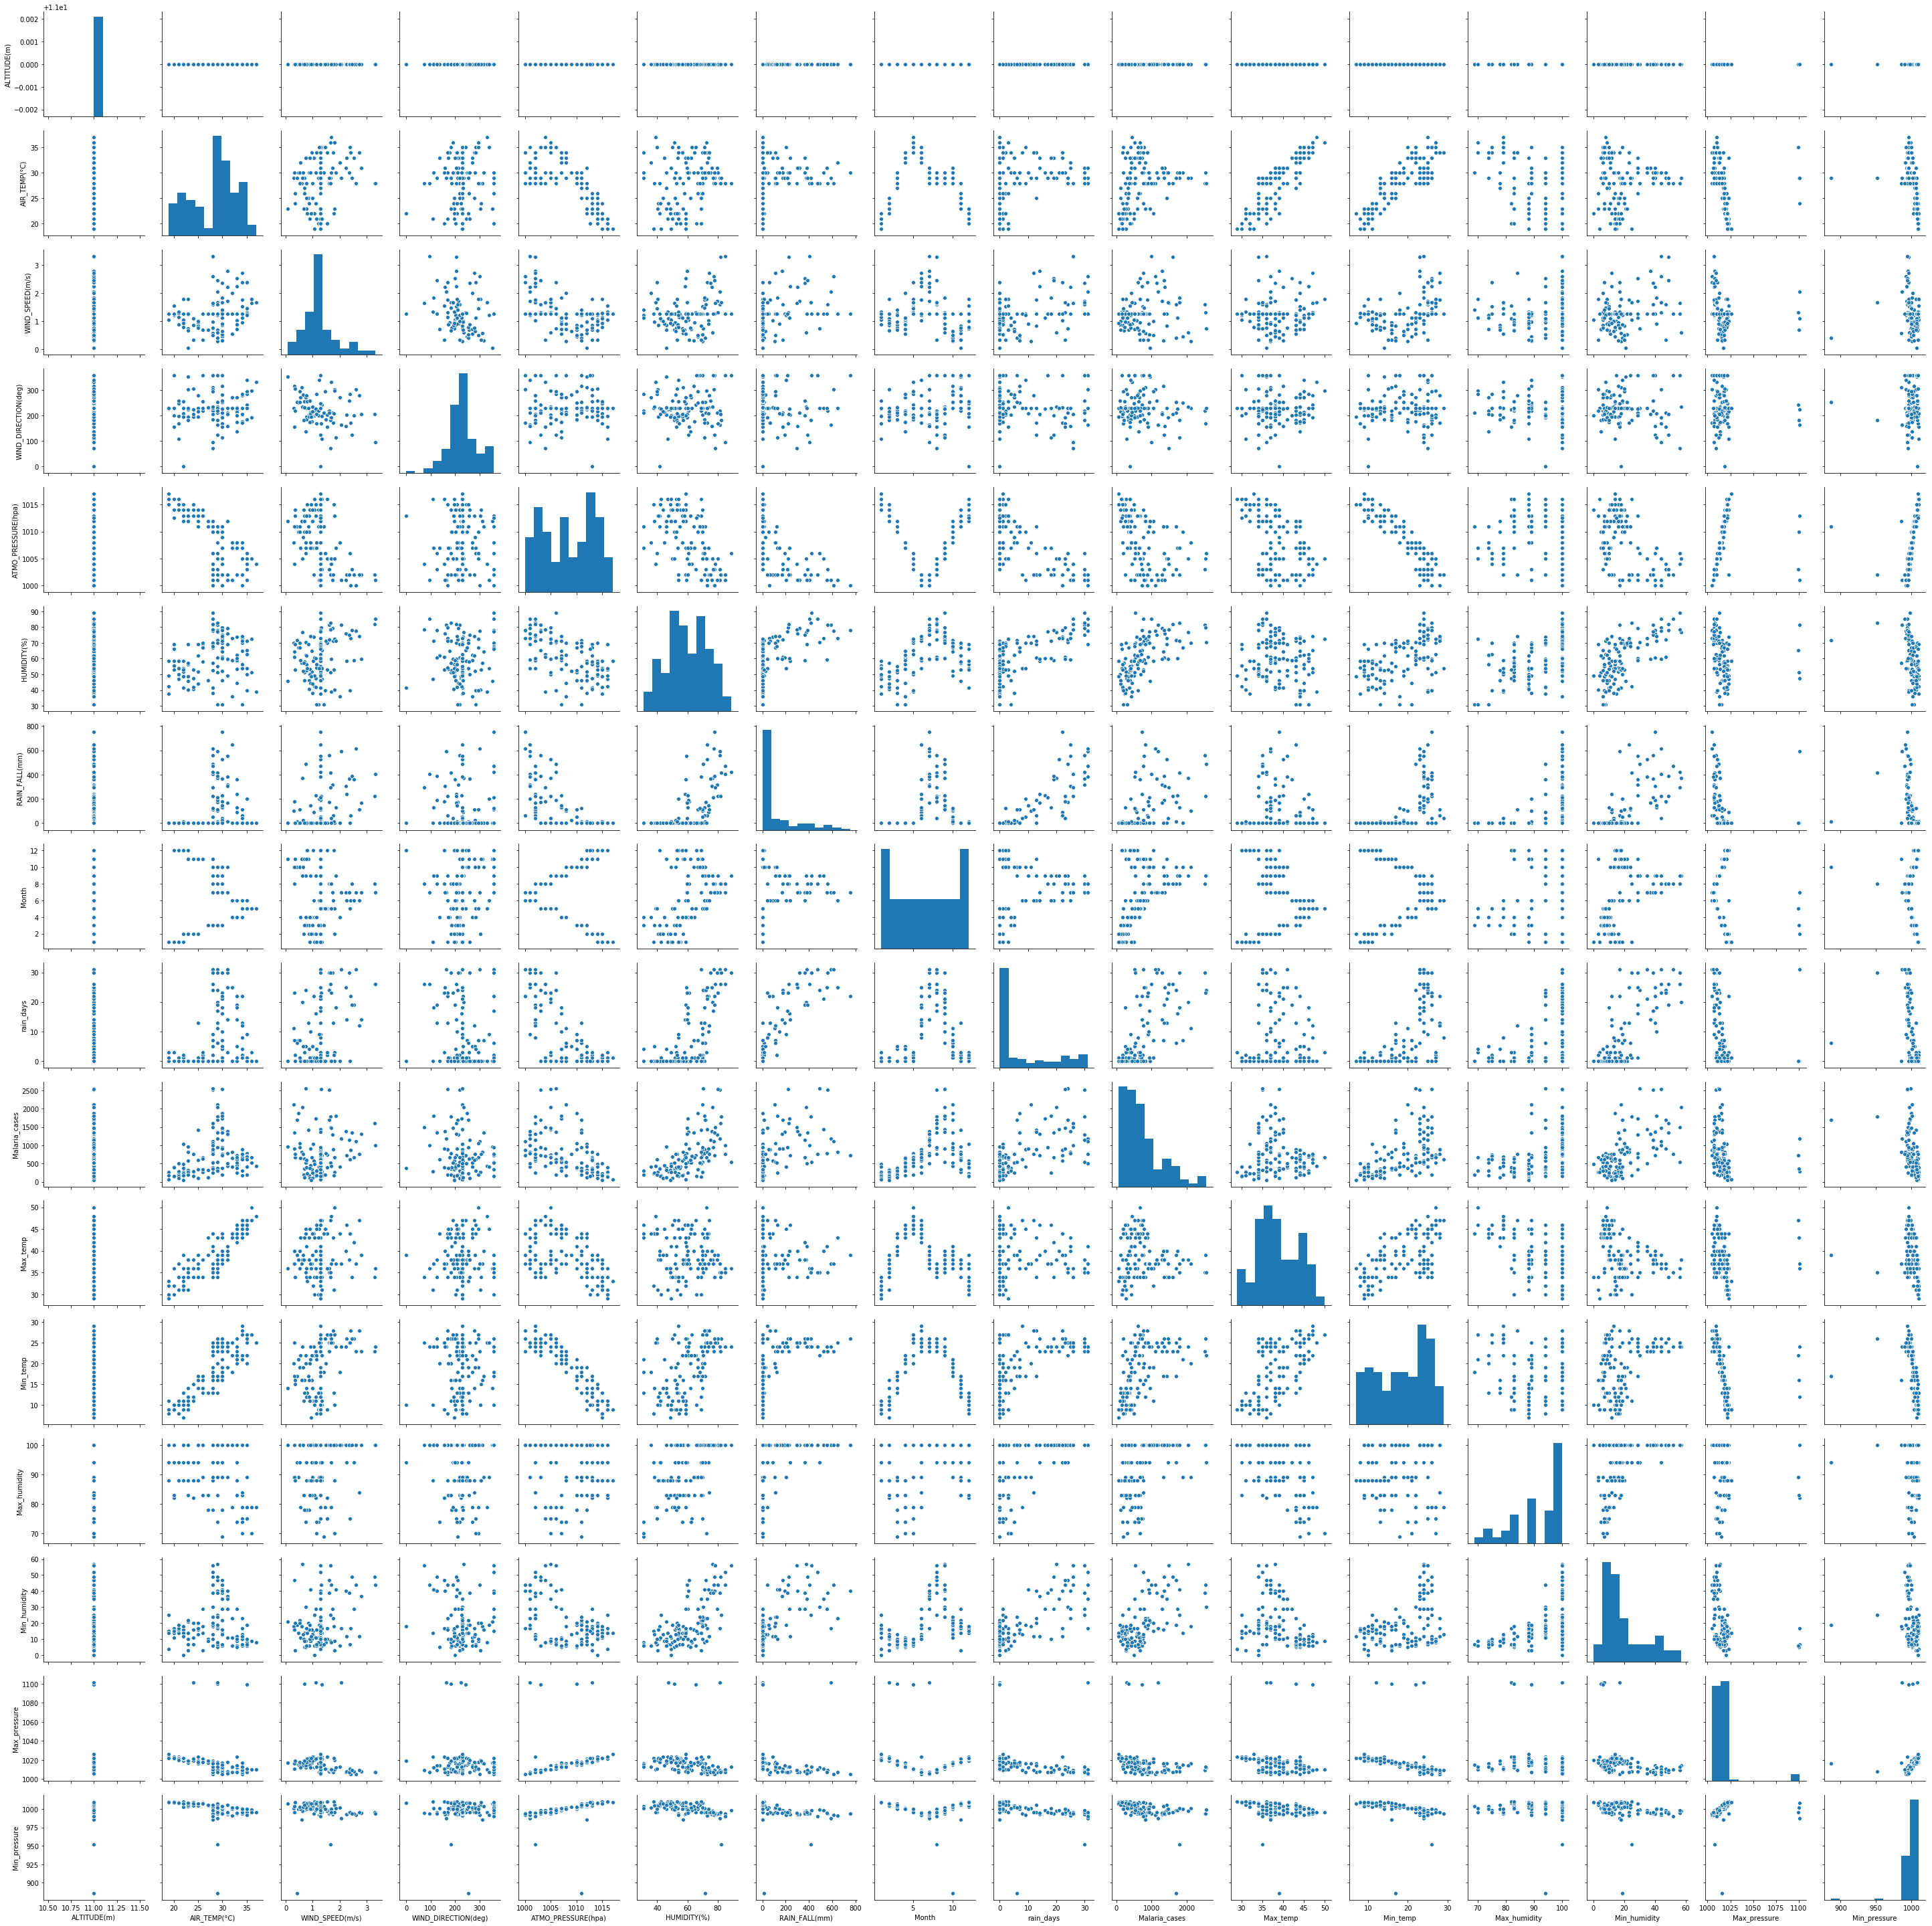

In [8]:
sns.pairplot(finalcsv)

In [14]:
finalcsv['Malaria_cases'].iplot(title='Malaria cases reported from 2010-2019',xTitle='Years')

In [24]:
allmalariacases = pd.read_html('https://www.suratmunicipal.gov.in/Departments/HealthDepartmentDiseaseReports')

In [25]:
malariacases = allmalariacases[3]

In [26]:
malariacases.head()

Month  Year  Collection  Examined  Positive Cases - Nos.  \
0  January  2005       32848     32848                    315   
1  January  2006       33153     33153                    337   
2  January  2007       40400     40400                    511   
3  January  2008       44852     44852                    253   
4  January  2009       53739     53739                    393   

   Positive Cases - (%)  P. Vivex(+) Case - Nos.  P. Vivex(+) Case - Per(%)  \
0                  0.96                      150                      47.62   
1                  1.02                      176                      52.23   
2                  1.26                      290                      56.75   
3                  0.56                       90                      35.57   
4                  0.73                      185                      47.07   

   P. Falci.(+) Cases - Nos.  P. Falci.(+) Cases - Per(%)  Death  
0                        165                        52.38      0  
1                        161                        47.77      0  
2                        221                        43.25      0  
3                        163                        64.43      0  
4                        208                        52.93      0

In [27]:
malariacases.columns

Index(['Month', 'Year', 'Collection', 'Examined', 'Positive Cases - Nos.',
       'Positive Cases - (%)', 'P. Vivex(+) Case - Nos.',
       'P. Vivex(+) Case - Per(%)', 'P. Falci.(+) Cases - Nos.',
       'P. Falci.(+) Cases - Per(%)', 'Death'],
      dtype='object')

In [28]:
malariacases.drop(['Positive Cases - (%)', 'P. Vivex(+) Case - Nos.',
       'P. Vivex(+) Case - Per(%)', 'P. Falci.(+) Cases - Nos.',
       'P. Falci.(+) Cases - Per(%)', 'Death'],axis=1,inplace=True)

In [29]:
malariacases.drop(['Collection','Examined'],inplace=True,axis=1)

In [30]:
tempdf = pd.pivot_table(malariacases,columns='Year',index='Month',values='Positive Cases - Nos.')

In [31]:
# finalmalaria.index = ['January','February','March','April','May','June','July','August','September','October','November','December','Total']

In [32]:
finalmalaria = pd.DataFrame(tempdf,index=['January','February','March','April','May','June','July','August','September','October','November','December','Total'])

In [33]:
# finalmalaria = pd.DataFrame(try1,columns=['January','February','March','April','May','June','July','August','September','October','November','December'])

In [34]:
finalmalaria.iloc[11,14] = 155

In [35]:
finalmalaria.iloc[10,11] = 765

In [36]:
finalmalaria['Sum'] = np.NaN

In [37]:
for i in range(len(finalmalaria)):
    finalmalaria.iloc[i,15] = int(finalmalaria.iloc[i,:].sum())

In [38]:
finalmalaria.drop('Total',inplace=True)

In [39]:
# finalmalaria.to_csv('2005-2019_Malaria_Cases.csv',index=True,header=True)

In [40]:
finalmalaria

Year         2005    2006    2007    2008    2009    2010    2011    2012  \
January     315.0   337.0   511.0   253.0   393.0   314.0   352.0   374.0   
February    314.0   288.0   352.0   202.0   328.0   293.0   327.0   338.0   
March       320.0   346.0   377.0   216.0   452.0   405.0   495.0   480.0   
April       413.0   387.0   339.0   335.0   459.0   653.0   691.0   713.0   
May         457.0   445.0   601.0   522.0   642.0   656.0   789.0   876.0   
June        633.0   912.0   566.0   660.0   771.0   662.0   923.0  1046.0   
July        751.0  1256.0   878.0  1112.0  1158.0  1680.0  1441.0  1501.0   
August     1201.0  2630.0  1430.0  1423.0  1960.0  2846.0  2127.0  1942.0   
September  1639.0  2997.0  1605.0  2716.0  1693.0  2233.0  2567.0  1717.0   
October    1097.0  1022.0  1648.0  1487.0  1246.0  1932.0  1285.0  1689.0   
November    643.0  1139.0   867.0   844.0   809.0  1371.0   761.0   612.0   
December    509.0   858.0   591.0   371.0   452.0   818.0   502.0   285.0   

Year         2013    2014    2015    2016    2017   2018   2019      Sum  
January     256.0   241.0   178.0   192.0   150.0   99.0   60.0   4025.0  
February    288.0   250.0   171.0   201.0   164.0  111.0   56.0   3683.0  
March       462.0   396.0   249.0   380.0   298.0  199.0  112.0   5187.0  
April       690.0   495.0   373.0   515.0   418.0  299.0  169.0   6949.0  
May         727.0   479.0   520.0   674.0   610.0  435.0  198.0   8631.0  
June        888.0   607.0   723.0   762.0   662.0  406.0  253.0  10474.0  
July       1418.0   774.0  1306.0  1152.0   998.0  724.0  510.0  16659.0  
August     1460.0   902.0  1472.0  1598.0  1355.0  939.0  757.0  24042.0  
September  1136.0  1362.0  1733.0  1799.0   915.0  541.0  537.0  25190.0  
October     843.0   937.0  1344.0  1055.0   770.0  426.0  517.0  17298.0  
November    722.0   667.0   639.0   765.0   591.0  266.0  343.0  11039.0  
December    335.0   496.0   390.0   238.0   168.0  137.0  155.0   6305.0

In [26]:
finalmalaria['Sum'].iplot(kind='bar',title='Number of cases registered in Months through 2005-2019',xTitle='Months')

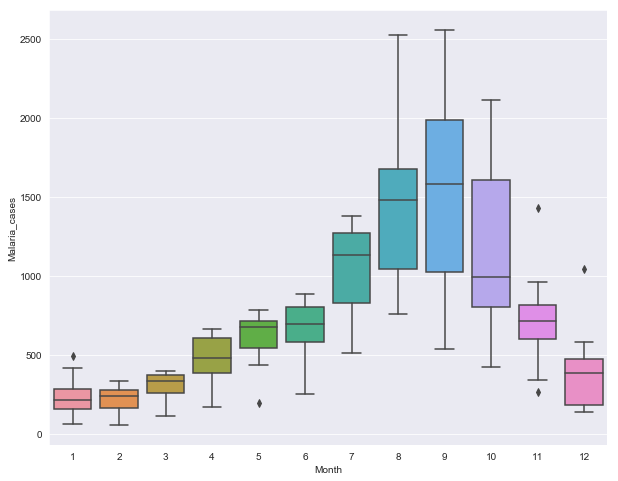

In [27]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.boxplot(data=finalcsv,x='Month',y='Malaria_cases')

In [28]:
fig = px.box(finalcsv,x='Month',y='Malaria_cases',color='Month')
fig.show()

In [29]:
# months = ['January','February','March','April','May','June','July','August','September','October','November','December']

# malariacases['Month'] = pd.Categorical(malariacases['Month'],categories=months,ordered=True)

# sorttemp = malariacases.sort_values('Year')

# sorttemp['Month'] = pd.Categorical(sorttemp['Month'],categories=months,ordered=True)

# sorttemp

In [30]:
# traces=[]

# for i,cases in finalcsv.groupby(by=finalcsv.index.year):
#     traces.append(go.Box(x=cases.index.month,y=cases.Malaria_cases,name=i))

# fig = go.Figure(data=traces)
# iplot(fig)

In [31]:
year = finalcsv.index.year
month = finalcsv.index.month

In [32]:
# humidity = finalcsv['HUMIDITY(%)'].to_string(index=False)

In [33]:
humidity = finalcsv['HUMIDITY(%)'].tolist()

In [34]:
humidity = np.array(humidity)

In [35]:
humiditydf = pd.DataFrame()

In [36]:
humiditydf['Year'] = year
humiditydf['Month'] = month
humiditydf['Humidity'] = humidity

In [37]:
humiditydf.head()

Year  Month   Humidity
0  2010      1  47.065367
1  2010      2  47.516195
2  2010      3  51.418374
3  2010      4  60.746518
4  2010      5  65.298106

In [38]:
humiditydf = pd.pivot_table(humiditydf,index='Month',columns='Year',values='Humidity')

In [39]:
humiditydf.index = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [40]:
humiditydf['Avg'] = np.NaN

In [41]:
tempmalaria = finalmalaria.drop(finalmalaria.iloc[:,:5],axis=1)

In [42]:
tempmalaria = tempmalaria.drop(tempmalaria.iloc[:,10:],axis=1)

In [43]:
tempmalaria['Sum'] = np.NaN

In [44]:
for i in range(len(tempmalaria)):
    tempmalaria.iloc[i,10] = int(tempmalaria.iloc[i,:].sum())

In [45]:
tempmalaria

Year         2010    2011    2012    2013    2014    2015    2016    2017  \
January     314.0   352.0   374.0   256.0   241.0   178.0   192.0   150.0   
February    293.0   327.0   338.0   288.0   250.0   171.0   201.0   164.0   
March       405.0   495.0   480.0   462.0   396.0   249.0   380.0   298.0   
April       653.0   691.0   713.0   690.0   495.0   373.0   515.0   418.0   
May         656.0   789.0   876.0   727.0   479.0   520.0   674.0   610.0   
June        662.0   923.0  1046.0   888.0   607.0   723.0   762.0   662.0   
July       1680.0  1441.0  1501.0  1418.0   774.0  1306.0  1152.0   998.0   
August     2846.0  2127.0  1942.0  1460.0   902.0  1472.0  1598.0  1355.0   
September  2233.0  2567.0  1717.0  1136.0  1362.0  1733.0  1799.0   915.0   
October    1932.0  1285.0  1689.0   843.0   937.0  1344.0  1055.0   770.0   
November   1371.0   761.0   612.0   722.0   667.0   639.0   600.0   591.0   
December    818.0   502.0   285.0   335.0   496.0   390.0   238.0   168.0   

Year        2018   2019      Sum  
January     99.0   60.0   2216.0  
February   111.0   56.0   2199.0  
March      199.0  112.0   3476.0  
April      299.0  169.0   5016.0  
May        435.0  198.0   5964.0  
June       406.0  253.0   6932.0  
July       724.0  510.0  11504.0  
August     939.0  757.0  15398.0  
September  541.0  537.0  14540.0  
October    426.0  517.0  10798.0  
November   266.0  343.0   6572.0  
December   137.0  155.0   3524.0

In [46]:
for i in range(len(humiditydf)):
    humiditydf.iloc[i,10] = int(humiditydf.iloc[i,:].mean())

In [47]:
humiditydf

Year            2010       2011       2012       2013       2014       2015  \
January    47.065367  48.980142  55.328358  37.714286  48.980142  42.414986   
February   47.516195  51.810767  48.597884  40.333333  51.810767  40.821374   
March      51.418374  46.041322  52.656904  41.642857  46.041322  38.181180   
April      60.746518  61.712428  64.735234  59.022989  44.537931  53.513274   
May        65.298106  69.813605  71.222222  62.714286  49.765823  51.290934   
June       73.947877  72.954930  71.357934  72.989583  53.923933  58.417722   
July       81.560872  79.454047  76.020921  77.558824  59.107018  59.886333   
August     81.245991  82.459534  72.192661  78.326531  61.106750  59.627747   
September  70.472637  79.838323  76.697183  72.911111  60.398601  60.094151   
October    70.104412  66.994141  71.646552  70.104412  70.104412  64.341033   
November   68.944224  57.167476  45.818182  68.944224  68.944224  58.162162   
December   58.657407  56.500000  41.400000  58.657407  58.657407  52.766846   

Year            2016  2017       2018       2019   Avg  
January    54.348649  54.0  50.000000  58.657407  49.0  
February   57.255000  42.0  44.000000  48.699248  47.0  
March      55.031250  31.0  31.000000  46.155807  43.0  
April      62.225575  36.0  31.000000  56.540870  53.0  
May        72.318548  40.0  39.000000  40.000000  56.0  
June       74.116667  59.0  54.000000  60.000000  65.0  
July       75.000000  85.0  78.000000  69.000000  74.0  
August     82.000000  78.0  77.000000  85.000000  75.0  
September  71.000000  74.0  70.000000  89.000000  72.0  
October    67.000000  52.0  49.000000  68.000000  64.0  
November   53.000000  62.0  70.104412  67.000000  62.0  
December   54.000000  53.0  68.944224  66.000000  56.0

In [48]:
# fig = go.Figure()

In [49]:
temperature = finalcsv['AIR_TEMP(°C)'].tolist()

In [50]:
temperature = np.array(temperature)

In [51]:
temperatureDF = pd.DataFrame()

In [52]:
temperatureDF['Year'] = year
temperatureDF['Month'] = month
temperatureDF['Temperature'] = temperature

In [53]:
temperatureDF.head()

Year  Month  Temperature
0  2010      1           21
1  2010      2           24
2  2010      3           29
3  2010      4           33
4  2010      5           35

In [54]:
temperatureDF = pd.pivot_table(temperatureDF,index='Month',columns='Year',values='Temperature')

In [55]:
temperatureDF.index = humiditydf.index = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [56]:
temperatureDF['Avg'] = np.NaN

In [57]:
for i in range(len(temperatureDF)):
    temperatureDF.iloc[i,10] = int(temperatureDF.iloc[i,:].mean())

In [58]:
temperatureDF

Year       2010  2011  2012  2013  2014  2015  2016  2017  2018  2019   Avg
January      21    22    20    19    19    19    21    21    21    19  20.0
February     24    25    23    23    22    24    23    24    25    22  23.0
March        29    30    28    28    27    28    29    29    30    27  28.0
April        33    33    34    32    33    33    33    32    34    34  33.0
May          35    34    35    35    35    36    36    35    37    35  35.0
June         33    34    34    32    34    33    34    33    35    33  33.0
July         29    31    31    28    31    31    30    28    30    31  30.0
August       28    29    29    28    30    30    28    29    29    28  28.0
September    28    30    29    30    29    30    30    30    29    28  29.0
October      29    30    29    28    30    30    28    30    31    28  29.0
November     25    28    23    23    26    26    24    25    26    26  25.0
December     22    23    22    20    21    20    22    22    20    20  21.0

In [59]:
rainfall = np.array(finalcsv['RAIN_FALL(mm)'].tolist())

In [60]:
rainfallDF = pd.DataFrame()

In [61]:
rainfallDF['Year'] = year
rainfallDF['Month'] = month
rainfallDF['Rainfall'] = rainfall

In [62]:
rainfallDF.head()

Year  Month  Rainfall
0  2010      1       1.0
1  2010      2       1.0
2  2010      3       1.0
3  2010      4       1.0
4  2010      5       1.0

In [63]:
rainfallDF = pd.pivot_table(rainfallDF,index='Month',columns='Year',values='Rainfall')

In [64]:
rainfallDF.index = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [65]:
rainfallDF['Avg'] = np.NaN

In [66]:
for i in range(len(rainfallDF)):
    rainfallDF.iloc[i,10] = int(rainfallDF.iloc[i,:].mean())

In [67]:
rainfallDF

Year         2010   2011    2012    2013    2014    2015    2016    2017  \
January      1.00    1.0    1.00    1.00    1.96    0.39    1.00    0.01   
February     1.00    1.0    1.00    0.03    1.74    1.00    0.03    1.00   
March        1.00    1.0    1.00    1.00    0.16    1.78    0.22    1.00   
April        1.00    1.0    0.31    0.01    1.00    0.44    0.06    0.04   
May          1.00    1.0    0.06    0.65    0.30    0.25    0.64    0.46   
June        91.20   61.0   63.00  648.00   41.00  238.00  112.00  362.00   
July       590.30  316.4  304.00  614.00  556.00  167.00  365.00  407.00   
August     561.30  417.3  174.00  293.00  177.00   42.00  224.00  390.00   
September  488.00  223.3  374.00  528.00  192.00  230.00  131.00  146.00   
October    103.20    1.0   12.00   52.00    0.37    4.00  110.00   27.00   
November     4.00    1.0    1.00    0.05    1.85    2.48    1.00    1.00   
December     0.16    1.0    0.09    1.00    0.44    0.04    1.00   16.00   

Year         2018        2019    Avg  
January      1.00    0.200000    0.0  
February     1.00    1.000000    0.0  
March        0.02    1.000000    0.0  
April        0.01    0.800000    0.0  
May          0.08    1.000000    0.0  
June       201.00  131.100000  194.0  
July       753.00  382.200000  445.0  
August     213.00  471.000000  296.0  
September  110.00  423.300000  284.0  
October     14.00  124.451613   44.0  
November     1.00    5.000000    1.0  
December     1.00    1.000000    2.0

In [68]:
pressure = np.array(finalcsv['ATMO_PRESSURE(hpa)'].tolist())

In [69]:
pressureDF = pd.DataFrame()

In [70]:
pressureDF['Year'] = year
pressureDF['Month'] = month
pressureDF['Pressure'] = pressure

In [71]:
pressureDF = pd.pivot_table(pressureDF,index='Month',columns='Year',values='Pressure')

In [72]:
pressureDF.index = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [73]:
pressureDF['Avg'] = np.NaN

In [74]:
for i in range(len(pressureDF)):
    pressureDF.iloc[i,10] = int(pressureDF.iloc[i,:].mean())

In [75]:
pressureDF

Year         2010    2011    2012    2013    2014    2015    2016    2017  \
January    1016.0  1014.0  1014.0  1015.0  1016.0  1016.0  1015.0  1016.0   
February   1013.0  1012.0  1012.0  1013.0  1012.0  1013.0  1014.0  1015.0   
March      1010.0  1010.0  1010.0  1011.0  1011.0  1012.0  1011.0  1011.0   
April      1007.0  1007.0  1007.0  1007.0  1008.0  1007.0  1008.0  1008.0   
May        1003.0  1005.0  1006.0  1004.0  1005.0  1005.0  1005.0  1006.0   
June       1002.0  1000.0  1002.0  1001.0  1002.0  1002.0  1002.0  1002.0   
July       1001.0  1001.0  1001.0  1000.0  1001.0  1002.0  1002.0  1001.0   
August     1003.0  1002.0  1003.0  1004.0  1004.0  1005.0  1002.0  1003.0   
September  1006.0  1005.0  1005.0  1005.0  1006.0  1007.0  1007.0  1007.0   
October    1008.0  1010.0  1011.0  1010.0  1011.0  1011.0  1010.0  1009.0   
November   1011.0  1012.0  1012.0  1013.0  1013.0  1013.0  1014.0  1013.0   
December   1012.0  1013.0  1013.0  1014.0  1015.0  1016.0  1015.0  1015.0   

Year         2018    2019     Avg  
January    1014.0  1017.0  1015.0  
February   1014.0  1015.0  1013.0  
March      1011.0  1012.0  1010.0  
April      1007.0  1008.0  1007.0  
May        1004.0  1006.0  1004.0  
June       1001.0  1002.0  1001.0  
July       1000.0  1001.0  1001.0  
August     1003.0  1002.0  1003.0  
September  1008.0  1006.0  1006.0  
October    1012.0  1011.0  1010.0  
November   1014.0  1013.0  1012.0  
December   1016.0  1012.6  1014.0

In [76]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=humiditydf.index,y=humiditydf['Avg'].tolist(),name='Humidity Avg(%)'),secondary_y=True)
fig.add_trace(go.Scatter(x=temperatureDF.index,y=temperatureDF['Avg'].tolist(),name='Temperature Avg(°C)'),secondary_y=True)
fig.add_trace(go.Scatter(x=rainfallDF.index,y=rainfallDF['Avg'].tolist(),name='Rainfall Avg(mm)'),secondary_y=True)
fig.add_trace(go.Scatter(x=pressureDF.index,y=pressureDF['Avg'].tolist(),name='Atmos. Pressure Avg(hpa)'),secondary_y=True)
fig.add_trace(go.Bar(x=tempmalaria.index,y=tempmalaria['Sum'].tolist(),name='Malaria Cases Registered'))
fig.update_layout(title_text='Humidity, Rainfall, Temperature, Atmos. Pressure Mean and Sum of Malaria Cases registered 2010-2019')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(secondary_y=True)
fig.update_yaxes(title_text='Malaria cases registered',secondary_y=False)

In [2]:
import dtale

In [4]:
d = dtale.show(finalcsv)

In [ ]:
d

In [25]:
finalcsv.iloc[-18,6] = 450
finalcsv.iloc[-6,6] = 471
finalcsv.iloc[-5,6] = 653

In [28]:
fig = make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=finalcsv.index,y=finalcsv['AIR_TEMP(°C)'],name='AIR_TEMP(°C)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.index,y=finalcsv['HUMIDITY(%)'],name='HUMIDITY(%)'),secondary_y=True)
fig.add_trace(go.Scatter(x=finalcsv.index,y=finalcsv['RAIN_FALL(mm)'],name='RAIN_FALL(mm)'),secondary_y=True)
fig.add_trace(go.Bar(x=finalcsv.index,y=finalcsv['Malaria_cases'],name='Malaria_cases',opacity=0.4))

In [32]:
finalcsv.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='DATE(IST)', length=120)

In [33]:
month = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [35]:
fig = make_subplots()
fig.add_trace(go.Scatter(x=month,y=finalcsv.iloc[-108:-96,9],name='year-2011'))
fig.add_trace(go.Scatter(x=month,y=finalcsv.iloc[-96:-84,9],name='year-2012'))
fig.add_trace(go.Scatter(x=month,y=finalcsv.iloc[-84:-72,9],name='year-2013'))
fig.add_trace(go.Scatter(x=month,y=finalcsv.iloc[-72:-60,9],name='year-2014'))
fig.add_trace(go.Scatter(x=month,y=finalcsv.iloc[-60:-48,9],name='year-2015'))
fig.add_trace(go.Scatter(x=month,y=finalcsv.iloc[-48:-36,9],name='year-2016'))
fig.add_trace(go.Scatter(x=month,y=finalcsv.iloc[-36:-24,9],name='year-2017'))
fig.add_trace(go.Scatter(x=month,y=finalcsv.iloc[-24:-12,9],name='year-2018'))
fig.add_trace(go.Scatter(x=month,y=finalcsv.iloc[-12:,9],name='year-2019'))
fig.update_layout(title_text='Gastroenteritis cases throughout years-Month-wise splitted')

In [37]:
malariaDC = seasonal_decompose(finalcsv['Malaria_cases'],period = 12)

NameError: name 'pyplot' is not defined

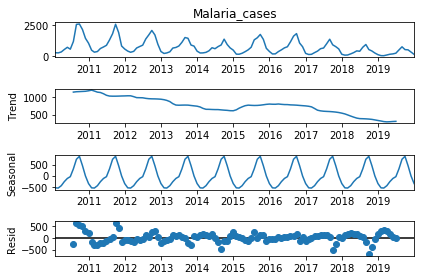

In [43]:
malariaDC.plot()

In [40]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=finalcsv.index,y=malariaDC.trend,name='Trend',mode='lines'))
fig.add_trace(go.Scatter(x=finalcsv.index,y=malariaDC.seasonal,name='Seasonality'))
fig.add_trace(go.Scatter(x=finalcsv.index,y=malariaDC.resid,name='Noise(Residual)'))
fig.add_trace(go.Scatter(x=finalcsv.index,y=finalcsv['Malaria_cases'],name='typhoid'))